In [1]:
import pandas as pd

# Creating a variable to initially read in dataset for project.
eegDatasetCleaned = pd.read_csv('../eegDatasetCleanedForModel.csv')

In [2]:
# Observing cleaned EEG dataset and prints the first 5 rows.
print('\n EEG DATA SET HEAD, \n----------------------------------------------------\n')
print(eegDatasetCleaned.head(5))


 EEG DATA SET HEAD, 
----------------------------------------------------

     specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  acuteStressDisorder         30.323572         29.558049        25.293659   
1  acuteStressDisorder         23.327612         34.845856        26.757280   
2  acuteStressDisorder         17.252066         15.155292        16.108600   
3  acuteStressDisorder         34.912317         39.136562        34.103989   
4  acuteStressDisorder          8.520262          9.073504        10.481318   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        25.431386        27.157943        26.064096        26.962306   
1        17.888937        18.073537        17.885986        19.711728   
2        18.438291        27.098033        19.733524        11.736709   
3        36.462923        37.904649        42.758987        38.002407   
4        16.898775        11.355207        10.495163        10.468839   

   AB.A.de

In [3]:
# Prints information about the EEG dataset.
eegDatasetCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1141 entries, specific.disorder to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140), object(1)
memory usage: 8.2+ MB


In [4]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG DATA SET SHAPE,\n----------------------------------------------------\n')
print('EEG dataset shape: \n', eegDatasetCleaned.shape)


 EEG DATA SET SHAPE,
----------------------------------------------------

EEG dataset shape: 
 (945, 1141)


In [5]:
# Checks data for missing values and spits a sum of entries missing
print('\n EEG DATA SET CHECK FOR MISSING ENTRIES, \n----------------------------------------------------\n')
print('Number of missing entries: ', eegDatasetCleaned.isnull().sum())


 EEG DATA SET CHECK FOR MISSING ENTRIES, 
----------------------------------------------------

Number of missing entries:  specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64


In [6]:
# To observe the range of disorders available in the data the following code is used.
eegDatasetCleaned['specific.disorder'].unique()

array(['acuteStressDisorder', 'adjustmentDisorder', 'alcoholUseDisorder',
       'behavioralAddictionDisorder', 'bipolarDisorder',
       'depressiveDisorder', 'healthyControl',
       'obsessiveCompulsiveDisorder', 'panicDisorder',
       'posttraumaticStressDisorder', 'schizophrenia',
       'socialAnxietyDisorder'], dtype=object)

In [7]:
# Counts the number of each disorder recorded.
disorderOccurrence = eegDatasetCleaned.groupby(['specific.disorder']).size()
print('\n EEG DISORDER OCCURRENCES COUNT, \n----------------------------------------------------\n')
print(disorderOccurrence)


 EEG DISORDER OCCURRENCES COUNT, 
----------------------------------------------------

specific.disorder
acuteStressDisorder             38
adjustmentDisorder              38
alcoholUseDisorder              93
behavioralAddictionDisorder     93
bipolarDisorder                 67
depressiveDisorder             199
healthyControl                  95
obsessiveCompulsiveDisorder     46
panicDisorder                   59
posttraumaticStressDisorder     52
schizophrenia                  117
socialAnxietyDisorder           48
dtype: int64


<Axes: >

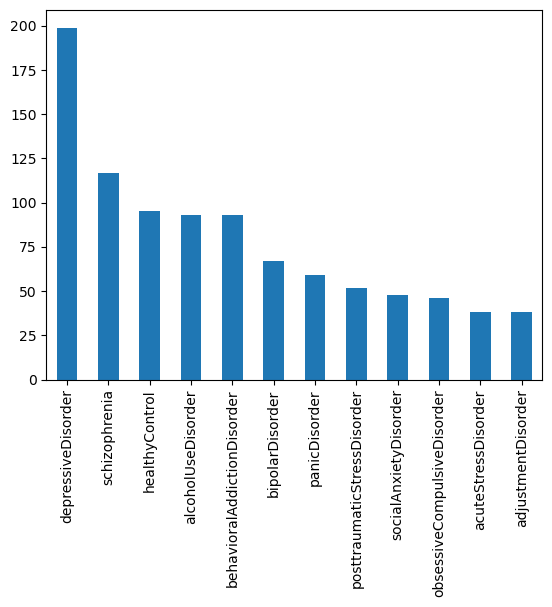

In [8]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot(kind='bar')

<Axes: ylabel='specific.disorder'>

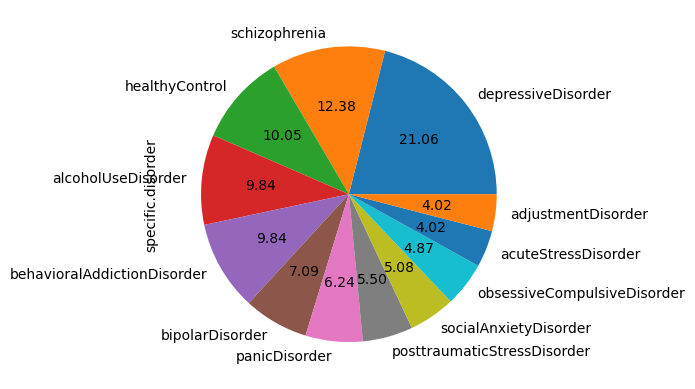

In [9]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [10]:
# As the model is only able to handle numeric data I had to convert the strings into integers so they could be processed.
# With the disorders converted to integers I next replaced the current strings with the new updated integer values.
eegDatasetCleaned['specific.disorder'] = eegDatasetCleaned['specific.disorder'].replace({
    'acuteStressDisorder':1, 
    'adjustmentDisorder':2, 
    'alcoholUseDisorder':3,
    'behavioralAddictionDisorder':4, 
    'bipolarDisorder':5,
    'depressiveDisorder':6, 
    'healthyControl':7,
    'obsessiveCompulsiveDisorder':8, 
    'panicDisorder':9,
    'posttraumaticStressDisorder':10, 
    'schizophrenia':11,
    'socialAnxietyDisorder':12
})

In [11]:
eegDatasetCleaned

specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0                    1         30.323572         29.558049        25.293659   
1                    1         23.327612         34.845856        26.757280   
2                    1         17.252066         15.155292        16.108600   
3                    1         34.912317         39.136562        34.103989   
4                    1          8.520262          9.073504        10.481318   
..                 ...               ...               ...              ...   
940                 12         17.585491         16.912154        16.676674   
941                 12         21.393045         23.018120        21.406082   
942                 12         19.543898         18.035856        20.696263   
943                 12         11.581630         16.528605        12.079624   
944                 12         43.770838         41.406970        39.470261   

     AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0          25.431386        27.157943        26.064096        26.962306   
1          17.888937        18.073537        17.885986        19.711728   
2          18.438291        27.098033        19.733524        11.736709   
3          36.462923        37.904649        42.758987        38.002407   
4          16.898775        11.355207        10.495163        10.468839   
..               ...              ...              ...              ...   
940        16.432607        12.560949        12.451371        12.126499   
941        22.840180        18.802283        19.366903        25.692413   
942        17.510941        19.099672        16.940304        15.605748   
943        19.150356        11.189703        10.523212         8.997941   
944        34.649438        35.002088        34.088621        30.795875   

     AB.A.delta.h.T3  AB.A.delta.i.C3  ...  COH.F.gamma.o.Pz.p.P4  \
0          16.140803        17.928469  ...              55.989192   
1           8.810296        16.205385  ...              45.595619   
2          11.327534        17.173299  ...              99.475453   
3          26.303330        32.681753  ...              59.986561   
4           9.622323        10.772125  ...              61.462720   
..               ...              ...  ...                    ...   
940        10.044354         9.446693  ...              82.905657   
941        10.097856        14.600330  ...              65.917918   
942         9.916546        15.404386  ...              61.040959   
943         5.713006         9.971759  ...              99.113664   
944        31.004148        32.043947  ...              78.600293   

     COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
0                16.739679              23.452271              45.678820   
1                17.510824              26.777368              28.201062   
2                70.654171              39.131547              69.920996   
3                63.822201              36.478254              47.117006   
4                59.166097              51.465531              58.635415   
..                     ...                    ...                    ...   
940              34.850706              63.970519              63.982003   
941              66.700117              44.756285              49.787513   
942              27.632209              45.552852              33.638817   
943              48.328934              41.248470              28.192238   
944              68.255430              70.687410              74.433908   

     COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
0                30.167520              16.918761              48.850427   
1                57.108861              32.375401              60.351749   
2                71.063644              38.534505              69.908764   
3                84.658376              24.724096              50.299349   
4                80.685608       

In [12]:
# Generating a correlation matrix
corr = eegDatasetCleaned.corr()

<Axes: >

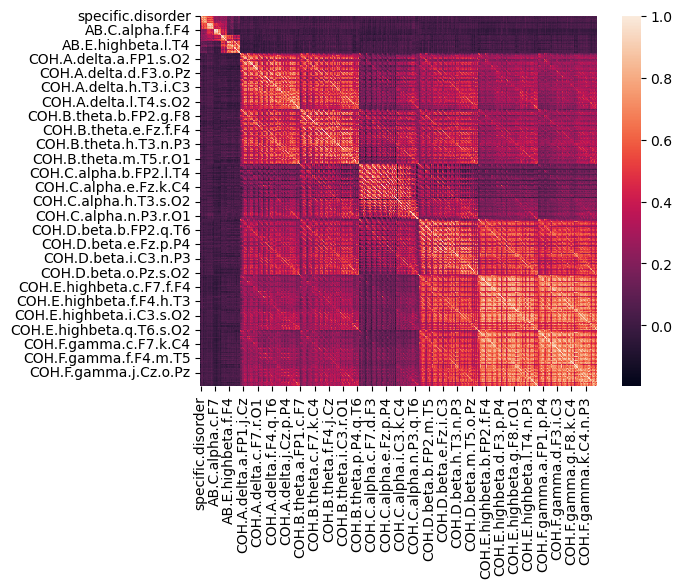

In [13]:
import seaborn as sns

# Generating a correlation heatmap to visually observe best correlations
sns.heatmap(corr)

In [14]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithOutDisorder = eegDatasetCleaned.loc[:, eegDatasetCleaned.columns != 'specific.disorder']

In [15]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
xRes,yRes = rus.fit_resample(eegTrainingDataWithOutDisorder, eegDatasetCleaned['specific.disorder'])

In [16]:
# Prints information about the EEG training smote dataset.
xRes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Columns: 1140 entries, AB.A.delta.a.FP1 to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140)
memory usage: 4.0 MB


In [17]:
# Prints information about the EEG true smote dataset.
yRes.info()

<class 'pandas.core.series.Series'>
RangeIndex: 456 entries, 0 to 455
Series name: specific.disorder
Non-Null Count  Dtype
--------------  -----
456 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [18]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRAINING DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG training dataset shape after smote: \n', xRes.shape)


 EEG TRAINING DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG training dataset shape after smote: 
 (456, 1140)


In [19]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG true value dataset shape after smote: \n', yRes.shape)


 EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG true value dataset shape after smote: 
 (456,)


<Axes: >

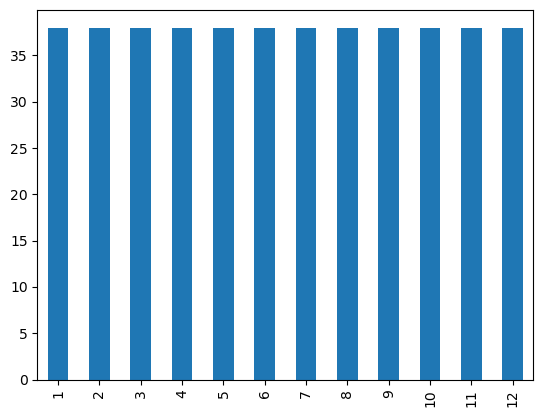

In [20]:
# Creating a visual plot to observe the y values after smote applied.
yRes.value_counts().plot(kind='bar')

<Axes: ylabel='specific.disorder'>

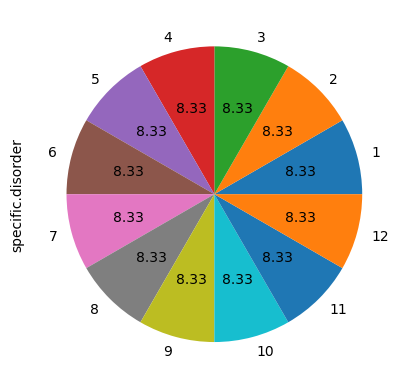

In [21]:
# Creating a visual plot to observe the unbalanced data.
yRes.value_counts().plot.pie(autopct='%.2f')

In [22]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(xRes, yRes, test_size=0.3, random_state=42)

In [23]:
from sklearn import tree

# Importing the decision tree api and setting a default model with decision tree configurations.
model = tree.DecisionTreeClassifier()

In [24]:
# Below I am training the model with the data previously set.
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.11678832116788321

In [26]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([10, 10,  6, 10,  8,  3,  9, 12, 10, 11,  9, 10,  7, 11,  8,  3,  7,
        8,  4, 10, 11,  1,  4, 12,  3,  7,  9,  5,  5,  2,  8, 10,  1,  9,
        5,  9,  7,  9, 12,  5, 10,  9,  7,  7,  8,  4,  6, 11,  2,  8,  7,
        8,  2,  2,  4, 12,  6,  9,  8,  3,  3,  4,  5,  6,  9,  4, 10,  8,
        7,  4,  8, 10,  5,  5,  6,  7,  9, 10,  2,  5,  8,  8,  7, 12, 12,
       12, 12,  9,  1,  4,  3,  2, 10,  7,  7,  4,  9, 12, 12,  1,  4,  3,
       12,  9,  8,  8,  9,  9,  3,  5,  8,  5,  9,  6,  2,  8, 10,  6,  9,
       10,  4,  8,  8,  2,  5, 10,  1,  6,  4,  7, 12,  6,  4,  9, 10,  6,
        8], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[0, 1, 0, 2, 3, 3, 0, 4, 1, 3, 1, 1],
       [0, 1, 1, 3, 1, 2, 2, 0, 2, 1, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 4, 1, 1, 3],
       [2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2],
       [1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0],
       [0, 0, 2, 3, 0, 1, 0, 0, 1, 2, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 4, 4, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 2, 0, 1, 2, 0, 3, 1, 0],
       [0, 1, 0, 2, 0, 0, 1, 5, 2, 2, 0, 0],
       [1, 2, 1, 2, 3, 2, 1, 1, 1, 0, 0, 4]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

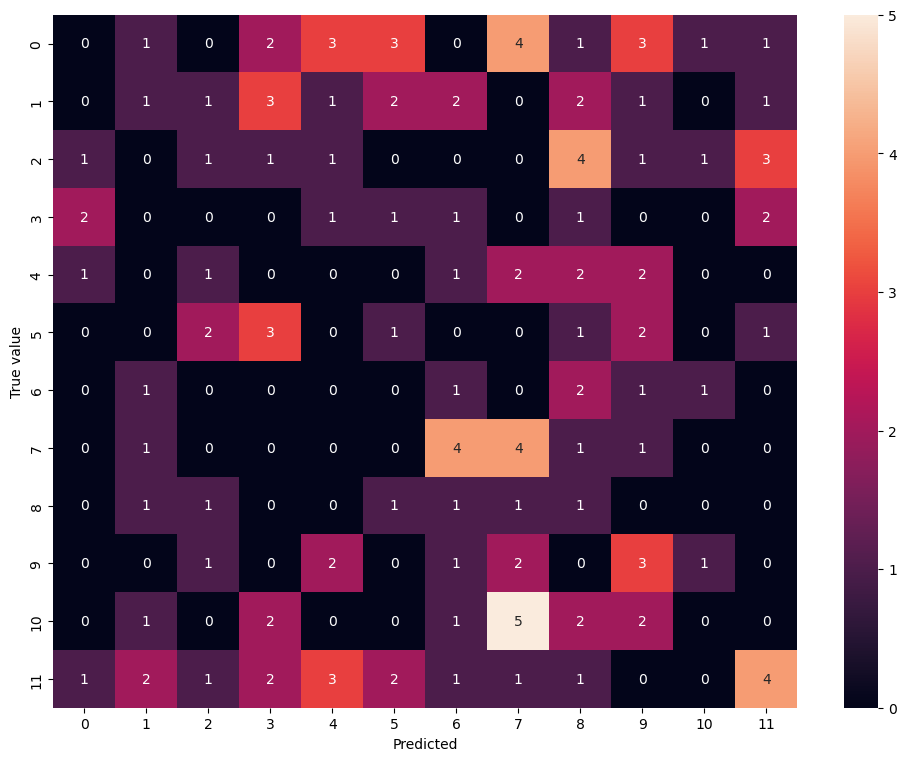

In [28]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [29]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.12      0.07      0.09        14
           3       0.12      0.08      0.10        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         9
           6       0.10      0.10      0.10        10
           7       0.08      0.17      0.11         6
           8       0.21      0.36      0.27        11
           9       0.06      0.17      0.08         6
          10       0.19      0.30      0.23        10
          11       0.00      0.00      0.00        13
          12       0.33      0.22      0.27        18

    accuracy                           0.12       137
   macro avg       0.10      0.12      0.10       137
weighted avg       0.11      0.12      0.11       137



In [30]:
import shap
import numpy as np
from catboost import Pool

# Variable below uses SHAP API to find feature importance of Catboost model.
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


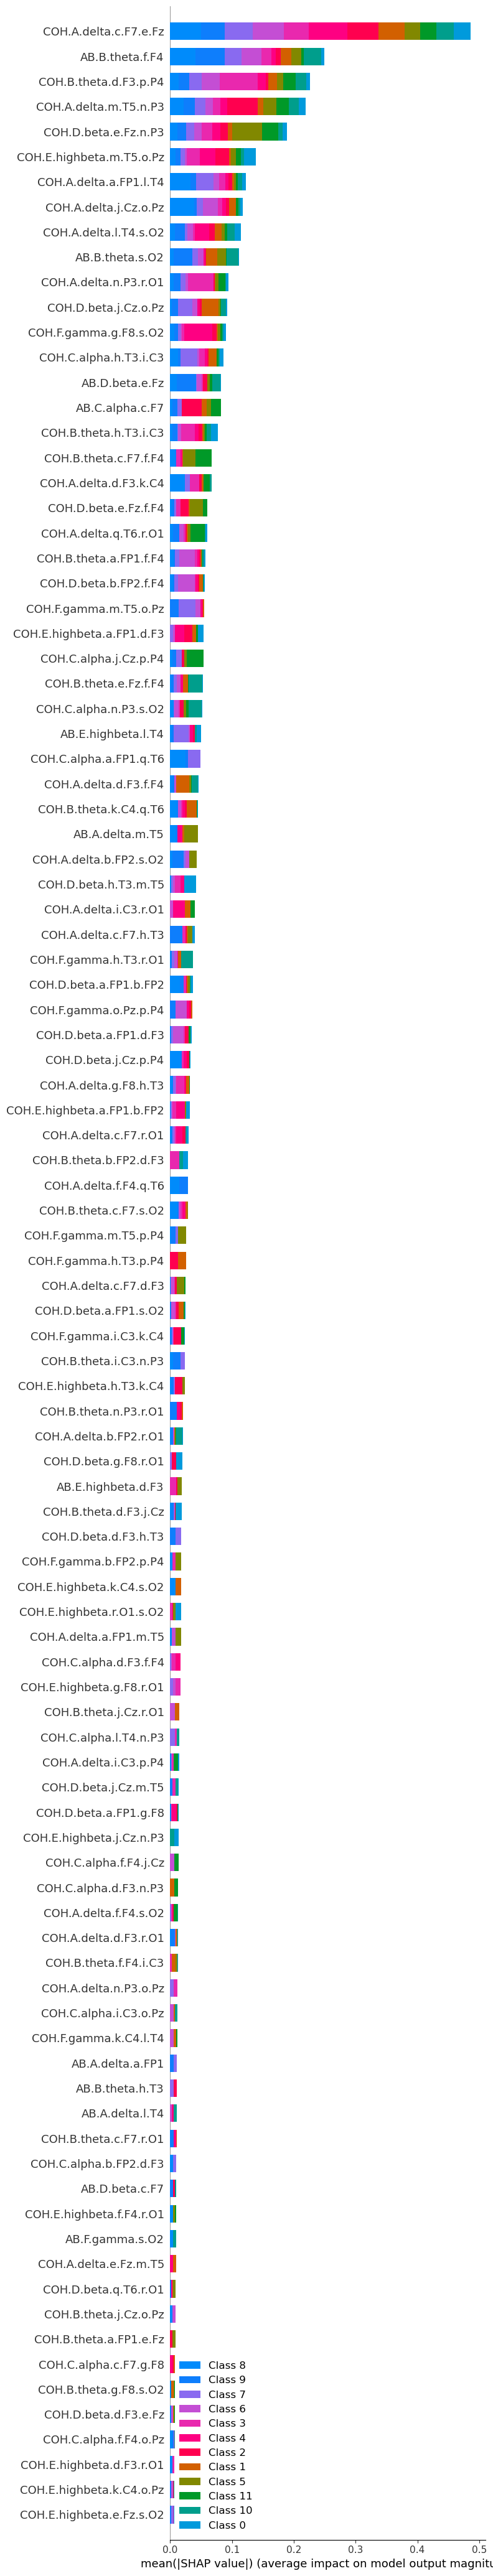

In [31]:
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, max_display = 100)


In [32]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

In [34]:
# Variable below stores the values with a standard deviation of 0
vals = np.abs(shap_values).mean(0)

# Below the feature importance variable stores a data frame that takes all the features used to train the model
# and then sorts those values based on the feature importance with the most important at the top.
feature_importance = pd.DataFrame(list(zip(X_train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)

# Printing an observation of the features and their importance in the model
feature_importance

col_name  feature_importance_vals
150   COH.A.delta.c.F7.e.Fz                 5.542048
24          AB.B.theta.f.F4                 2.841086
347   COH.B.theta.d.F3.p.P4                 2.577607
264   COH.A.delta.m.T5.n.P3                 2.495540
701    COH.D.beta.e.Fz.n.P3                 2.152125
...                     ...                      ...
412   COH.B.theta.j.Cz.l.T4                 0.000000
413   COH.B.theta.j.Cz.m.T5                 0.000000
414   COH.B.theta.j.Cz.n.P3                 0.000000
416   COH.B.theta.j.Cz.p.P4                 0.000000
1139  COH.F.gamma.r.O1.s.O2                 0.000000

[1140 rows x 2 columns]

In [35]:
# Below I am retrieving the 10 most important features to the model to try improve
# model accuracy by ignorning redundant / non impactful features.

selectedFeaturesColumns = feature_importance.head(10)

selectedFeatureColumnsNames = selectedFeaturesColumns['col_name'].tolist()

# Printing an observation of the features and their importance in the model
selectedFeatureColumnsNames

['COH.A.delta.c.F7.e.Fz',
 'AB.B.theta.f.F4',
 'COH.B.theta.d.F3.p.P4',
 'COH.A.delta.m.T5.n.P3',
 'COH.D.beta.e.Fz.n.P3',
 'COH.E.highbeta.m.T5.o.Pz',
 'COH.A.delta.a.FP1.l.T4',
 'COH.A.delta.j.Cz.o.Pz',
 'COH.A.delta.l.T4.s.O2',
 'AB.B.theta.s.O2']

In [36]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithTopFeaturesOnly = eegTrainingDataWithOutDisorder.reindex(columns = selectedFeatureColumnsNames)
eegTrainingDataWithTopFeaturesOnly

COH.A.delta.c.F7.e.Fz  AB.B.theta.f.F4  COH.B.theta.d.F3.p.P4  \
0                27.816832        19.066901               7.242047   
1                47.158736         9.473418              22.494797   
2                66.195530        55.760915              13.631060   
3                22.220491        49.210181              13.436977   
4                28.951934        11.407290              38.273953   
..                     ...              ...                    ...   
940              21.618074        10.131778              45.378547   
941              77.873309        10.474350              58.476578   
942              99.764306        13.821376               8.935196   
943              38.485546        10.937278              27.761200   
944              41.801764        14.723114              11.777934   

     COH.A.delta.m.T5.n.P3  COH.D.beta.e.Fz.n.P3  COH.E.highbeta.m.T5.o.Pz  \
0                10.708163             14.532910                 14.265242   
1                62.416477             16.525459                 22.774359   
2                65.805773             12.150744                 30.522151   
3                29.071161             24.562134                 60.578841   
4                21.346890             38.654193                 43.180663   
..                     ...                   ...                       ...   
940              99.910846             19.674992                 73.943584   
941              96.857465             21.947856                 36.452417   
942              77.466098              4.020287                 16.120743   
943               9.932378              9.681808                 36.230111   
944              58.406756             34.078386                 63.561248   

     COH.A.delta.a.FP1.l.T4  COH.A.delta.j.Cz.o.Pz  COH.A.delta.l.T4.s.O2  \
0                  7.557851              38.761829               2.954852   
1                 18.640909              32.200612               8.377031   
2                  5.032835              40.578781              14.447679   
3                 13.849663              29.609219               8.939971   
4                 16.335934              23.585926              16.180033   
..                      ...                    ...                    ...   
940               12.292553              80.063581              31.838066   
941               60.342603              84.295619              99.410206   
942               17.221651              52.114825               2.540231   
943               45.187665              64.919949              23.335196   
944                7.414564              51.019753               4.469640   

     AB.B.theta.s.O2  
0           9.377386  
1           7.622044  
2          25.846790  
3          24.147011  
4           7.980278  
..               ...  
940         7.970765  
941         7.886639  
942         7.781718  
943        10.129412  
944        10.232243  

[945 rows x 10 columns]

In [37]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(eegTrainingDataWithTopFeaturesOnly, eegDatasetCleaned['specific.disorder'], test_size=0.3, random_state=42)

In [38]:
from sklearn import tree

# Importing the decision tree api and setting a default model with decision tree configurations.
model = tree.DecisionTreeClassifier()

In [39]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.1267605633802817

In [41]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([11,  1,  3,  1, 10,  6,  5,  9,  2,  6, 11, 11,  9, 12,  4,  5,  9,
        6,  9,  6,  2,  6,  6,  6, 11,  6,  6,  4,  4, 10, 12,  8,  9, 10,
        5, 11,  4,  4, 11,  6,  3,  5, 12,  1,  6, 11,  1,  6,  4, 10,  6,
       11,  3,  3, 11,  2, 10,  6,  4,  7, 11,  9, 11, 11,  6,  3,  6,  6,
        3,  1,  4, 10,  7, 11,  4,  2, 11,  4,  6,  6, 11,  3,  6,  1,  4,
        3,  4,  6, 11,  4,  5,  9,  6,  2, 11,  4,  4, 11,  5,  9, 10,  6,
        1,  7, 10,  2,  6,  4,  6,  6, 11,  1,  6,  7,  4, 11,  9,  6,  5,
       10,  7,  5,  6,  8, 10,  4,  4,  7,  3,  7,  3, 12, 12,  3,  9,  3,
       11,  2,  8,  9, 11,  6,  4,  6,  6,  6,  2,  7,  6, 11,  4, 11,  6,
        7,  6,  8,  6,  1, 11,  2, 12,  1,  6,  6,  9,  2,  7,  6,  7,  1,
       11,  1,  6,  5,  6,  4, 11, 12,  5,  3,  7,  7,  9, 10,  6,  6, 10,
       10,  9,  1, 11,  3, 10,  4,  6, 11,  3, 11, 11,  6, 12,  5,  6,  6,
       12, 10, 11, 11,  2, 11, 12,  8,  9, 11, 10, 10, 11,  4, 12,  7, 11,
       11, 11,  3,  3,  6

In [42]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[ 2,  0,  1,  1,  1,  2,  2,  0,  0,  1,  0,  0],
       [ 0,  2,  0,  1,  0,  7,  1,  0,  0,  0,  2,  0],
       [ 0,  0,  2,  2,  1,  3,  1,  0,  3,  4,  7,  2],
       [ 1,  2,  3,  5,  3,  6,  0,  0,  1,  0,  2,  3],
       [ 3,  0,  6,  6,  2,  5,  0,  0,  1,  0,  4,  1],
       [ 4,  5,  6,  5,  3, 12,  5,  1,  4,  5, 10,  1],
       [ 1,  2,  2,  3,  0,  9,  2,  2,  3,  3,  4,  0],
       [ 1,  0,  0,  3,  1,  1,  1,  1,  2,  0,  2,  0],
       [ 3,  0,  0,  0,  1,  8,  1,  0,  1,  0,  4,  1],
       [ 0,  0,  0,  0,  2,  4,  1,  0,  1,  2,  1,  0],
       [ 3,  2,  3,  3,  1,  5,  1,  3,  2,  5,  4,  2],
       [ 0,  0,  2,  0,  1,  3,  1,  0,  2,  0,  4,  1]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

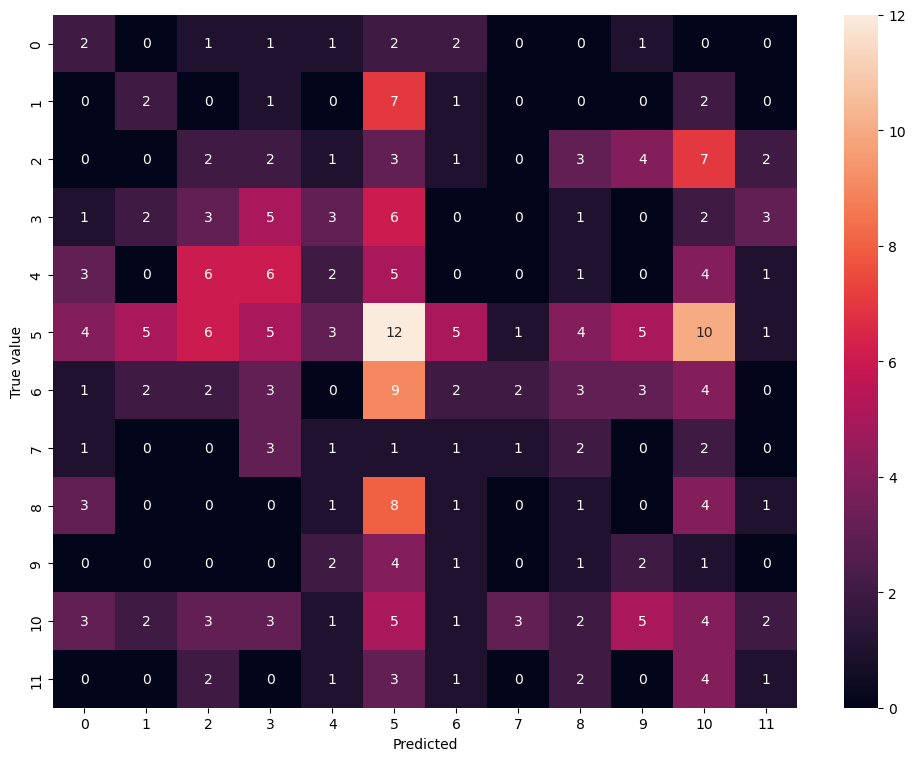

In [43]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [44]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.11      0.20      0.14        10
           2       0.15      0.15      0.15        13
           3       0.08      0.08      0.08        25
           4       0.17      0.19      0.18        26
           5       0.12      0.07      0.09        28
           6       0.18      0.20      0.19        61
           7       0.12      0.06      0.09        31
           8       0.14      0.08      0.11        12
           9       0.05      0.05      0.05        19
          10       0.10      0.18      0.13        11
          11       0.09      0.12      0.10        34
          12       0.09      0.07      0.08        14

    accuracy                           0.13       284
   macro avg       0.12      0.12      0.12       284
weighted avg       0.13      0.13      0.12       284



In [50]:
# Sources used to help develop the code.

# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
# https://datagy.io/python-optuna/
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Census%20income%20classification%20with%20scikit-learn.html
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html
# https://medium.com/mlearning-ai/multiclass-classification-with-auto-tuning-catboost-5d352e30778d
# https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/
# https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://pub.aimind.so/hyperparameter-optimization-of-random-forest-model-using-optuna-for-a-regression-problem-6f49d9b520b7
# https://forecastegy.com/posts/how-to-use-optuna-to-tune-lightgbm-hyperparameters/
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
# https://drbeane.github.io/python_ml/pages/autosearch.html